# 泰坦尼克号数据科学解决方案

- 比赛链接：https://www.kaggle.com/c/titanic/overview/tutorials
- 原文链接：https://www.kaggle.com/startupsci/titanic/titanic-data-science-solutions

本笔记本的目标是按照逐步的工作流程，解释我们在解决方案开发过程中做出的每个决定的每个步骤和基本原理。

## 工作流程

根据 [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312)书中描述的七个阶段。
1. 问题定义
2. 获取训练和测试数据
3. 处理、准备、清洗数据
4. 分析、识别模式和探索数据
5. 建模、预测和解决问题
6. 可视化，报告和呈现问题解决步骤和最终解决方案
7. 提供结果

## 问题定义

根据训练数据中的乘客存活与否的信息，建立模型，在测试集中预测乘客是否存活。

注意点：
- 1912年4月15日，在她的处女航中，泰坦尼克号在与冰山相撞后沉没，2224名乘客和机组人员中有1502人死亡。即生存率为32％。
- 造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。
- 尽管幸存下沉有一些运气因素，但有些人比其他人更容易生存，例如妇女，儿童和上流社会。

## 工作流目标

数据科学解决方案工作流程解决了七个主要目标。

**分类** 我们可能希望对样本进行分类。我们可能还想了解不同类的含义或与我们的目标的相关性。

**相关** 可以基于训练数据集内的可用特征来解决问题。数据集中的哪些特征对我们的目标有重大贡献？从统计学上讲，特征和目标之间是否存在相关性？随着特征值的变化，解决方案状态也会发生变化，反之亦然？这可以针对给定数据集中的数值和类别特征进行测试。我们可能还希望确定除后续目标和工作流程阶段之外的特征之间的相关性。关联某些特征可能有助于创建，补全或更正特征。

**转换** 对于建模阶段，需要准备数据。根据模型算法的选择，可能需要将所有特征转换为数值等效值。例如，将文本分类值转换为数值。

**补全** 数据准备可能还需要我们估计特征中的任何缺失值。当没有缺失值时，模型算法可能最有效。

**纠正** 我们还可以分析给定的训练数据集中的错误或可能在特征内提取值特征内的错误值，并尝试纠正这些值或排除包含错误的样本。一种方法是检测我们的样本或特征中的任何异常值。如果某项特征不对分析做出贡献，或者可能会严重影响结果，我们也可能完全丢弃该特征。

**创建** 我们是否可以基于现有的特征或一组特征创建新特征，以便新特征遵循关联，转换和完整性目标。

**图表** 如何根据数据的性质和解决方案目标选择正确的可视化图表。

## 导入相关库

In [1]:
# 数据分析和处理
import pandas as pd
import numpy as np
import random as rnd

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 机器学习
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 获取数据

使用 Pandas， 讲训练数据和测试数据存入 DataFrames。

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]

## 通过描述数据来进行分析

Pandas 能够帮助我们描述数据，回答以下问题。

**哪些特征在数据几中有用？**

具体特征描述可看 https://www.kaggle.com/c/titanic/data


In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**哪些特征是类别特征？**

这些值将样本分类为类似样本的集合。在类别特征中，基于名字，序数，比率或区间的值？ 除此之外，这有助于我们选择适当的可视化图。

- 类别： Survived, Sex, and Embarked. Ordinal: Pclass.

**哪些特征是数值特征？**

这些值随样本而变化。 在数值特征中，值是离散的，连续的还是基于时间序列的？ 除此之外，这有助于我们选择适当的可视化图。

- 连续值: Age, Fare. 离散值: SibSp, Parch.

In [3]:
# 预览数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**哪些特征有多种数据类型？**
- 船票混合了数字和字母。Cabin（船舱）是字母加数字的。

**哪些特征包含错误？**

在大数据集上这一问题难以查看，但是我们可以通过检查小数据集的样本来知晓哪些特征需要修正。

- 名字特征可能包含错误或拼写错误，因为有几种方法可用于描述名字，包括标题，圆括号和用于替代或短名称的引号。

In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**哪些特征包含空格，null 或空值？**

这些特征需要修正。

- Cabin > Age > Embarked 特征包含 NUll 值。

**特征的数据类型是什么？**

特征转换时有用。

- 七个特征是整数或浮点数。 在测试数据集的情况下为六。
- 五个特征是字符串(Object)。

In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**本中数值特征值的分布是什么？**

这能帮助我们提前了解训练数据集如何体现实际问题。

- 样本数为 891 
- Surived 是 0 1类别特征
- 大约 38% 的样本是幸存的
- 大部分乘客（>75%）没有父母或者孩子在船上
- 大约 30% 乘客有兄妹或者配偶
- 票价差异很大，<1% 的乘客票价高达 $512
- <1% 的乘客年龄在 65-80

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# 通过 `percentiles=[.61, .62]` 知道生存率为 38%
train_df.describe(percentiles=[.61, .62])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# 通过 `percentiles=[.75, .8]` 查看 Parch 分布
train_df.describe(percentiles=[.75, .8])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# 通过 `percentiles=[.68, .69]` 查看 SibSp 分布
train_df.describe(percentiles=[.68, .69])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


**类别特征的分布如何？**

- 姓名唯一（count=unique=891）
- 65% 男性 （577/891）
- 船舱（Cabin）有重复，说明有乘客共用船舱
- Embarked 有三种取值，从 S 港登船的最多
- Ticket 的重复率最高

In [27]:
# include=['O'] 为只输出离散型变量 （输出 Object 类型）
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sdycoff, Mr. Todor",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### 基于数据分析的假设

我们基于迄今为止所做的数据分析得出以下假设。 我们可能会在采取适当行动之前进一步验证这些假设。

**相关性**

每个特征与幸存的相关性。 希望在项目的早期阶段完成这项工作。

**补全**

1. 补全年龄特征，因为它一定与幸存相关
2. 补全港口特征，因为日它可能与幸存或者其他特征相关联

**纠正**

1. Tickt 特征可以删除，因为它包含很多重复值（22%），并且Ticket和幸存应该没有关联
2. Cabin 特征可以删除，因为它包含太多 null 值
3. PassengerId 可以删除
4. Name 特征可以删除

**创建**

1. 我们可以通过 Parch 和 SibSp 创建 Family 特征，从而获得船上的家庭成员总数
2. 提取 Title 创建 Name 特征
3. 创建年龄段特征，将数值特征离散化为顺序类别特征
4. 创建 Fare 范围特征

**分类**

我们还可以根据前面提到的问题描述添加我们的假设。

1. 女士更容易存活
2. 儿童（age < ?）更容易存活
3. 高级别的船票（Pclass=1）更容易存活

## 通过数据透视特征进行分析

为了确认我们的一些观察和假设，我们可以通过聚合特征来快速分析我们的特征相关性。 我们只能在此阶段为没有任何空值的特征执行此操作。 对于分类（性别），序数（Pclass）或离散（SibSp，Parch）类型的特征，这样做也是有意义的。

- **Pclass** 可以看到明显的关联性 Pclass=1时，有62.9% 的存活率。这以特征需要加入模型中
- **Sex** Sex=female 有74%的存活率
-**SibSp和Parch** 这些特征对于某些值具有零相关性。 最好从这些单独的特征中导出一个特征或一组特征

In [9]:
# as_index=False , Pclass 就不回作为 Dataframe 的索引了， 默认为 True
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [5]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [7]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 通过可视化数据来进行分析

现在我们可以继续使用可视化来确认我们的一些假设来分析数据。

### 关联数值特征

理解数值特征与目标的相关性。

直方图可用于分析像Age这样的连续数值变量。 直方图可以使用自动定义的区间或等距离范围来表示样本的分布。 这有助于我们分析特定区间（婴幼儿的生存率是否更高？）

**观察**

- 婴幼儿（age<=4，数据集中最大你年龄为 80）有较高的存活率
- 年纪最大的乘客（age=80）全部存活
- 15-25岁的 乘客很大部分没有存活
- 乘客的主要你年龄在 15-35 之间

**决策**

- 将 Age 放入模型中
- 为 Age 补全 null 值
- 应该为年龄分段

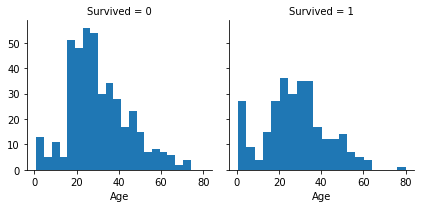

In [12]:
g = sns.FacetGrid(train_df,  col='Survived')
# 将 age 分为 20 个片段
g.map(plt.hist, 'Age', bins=20)

### 关联数值特征和序列特征

我们可以在一个图中结合多个特征来分析相关性。这种方法可以应用在数值型和有数值的分类特征中。

**观察**

- Pclass=3 的乘客最多，存活率最低，与我们的假设相符
- Pclass=2 和 Pclass=3 的婴幼儿大部分存活
- Pclass=1 的乘客大部分存活
- 不同的 Pclass 的年龄分布不同

**决策**

- 在模型训练中考虑 Pclass

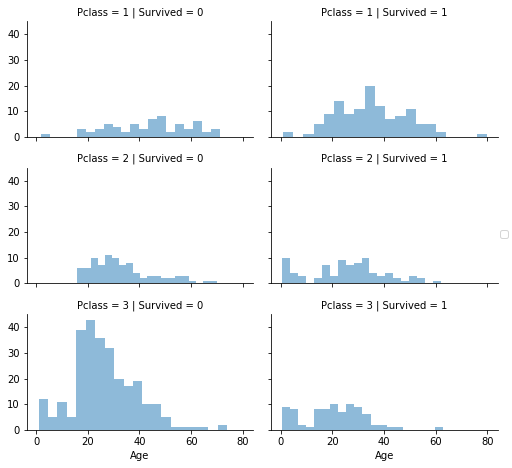

In [26]:
# aspect: 宽高比  width = size * aspect , size : height
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
# alpha: 透明度
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

###  关联类别特征

**观察**

- 女性乘客更容易存活
- Embarke = C 时男性有更高的成活率。这可能是Pclass和Embarked之间的相关性，反过来是Pclass和Survived，不一定是Embarked和Survived之间的直接相关。
- Pclass = 3 时，不同 Embarked 的男性成活率不同

**决策**

- 增加 Sex 到模型训练中
- 补全并增加 Embarked 特征到模型训练中

In [30]:
help(sns.pointplot)

Help on function pointplot in module seaborn.categorical:

pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000001C164992158>, ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)
    Show point estimates and confidence intervals using scatter plot glyphs.
    
    A point plot represents an estimate of central tendency for a numeric
    variable by the position of scatter plot points and provides some
    indication of the uncertainty around that estimate using error bars.
    
    Point plots can be more useful than bar plots for focusing comparisons
    between different levels of one or more categorical variables. They are
    particularly adept at showing interactions: how the relationship between
    levels of one categorical variable changes across levels of a second
    categorical variable. The l

D:\APP\Program\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\APP\Program\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


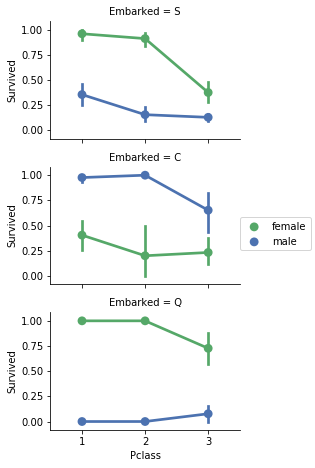

In [32]:
grid = sns.FacetGrid(train_df, row='Embarked', size = 2.2, aspect=1.6)

# sns.pointplot(x, y, hue)  'Pclass', 'Survived', 'Sex'
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### 关联类别和数值特征

Embarked，Sex，Fare

**观察**

- 船票高的乘客存活率高
- Embarked 与幸存相关

**决策**

- 考虑将 Fare 特征分段

D:\APP\Program\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


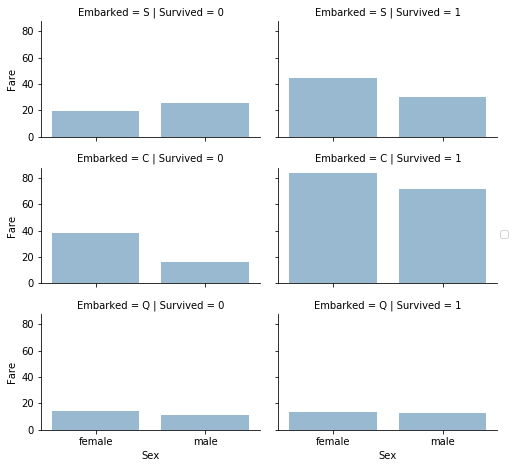

In [33]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 处理数据

我们收集了有关数据集和解决方案要求的若干假设和决策。 到目前为止，我们没有更改单个特征来实现这些目标。现在让我们执行决策和假设来修正，创建和完成目标。

### 通过删除特征来修正数据

通过删除特征减少数据，加快处理，并简化分析。

- 根据我们的假设和决策，放弃 Cabin 和 Tickets。

- 请注意，我们同时对训练和测试数据集执行操作以保持一致。

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [3]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### 从现有特征中创建新特征

在删除 Name 和 PassengerId 之前，先分析 Name 特征，提取 titles，并测试title与 survival 的关联。

**观察**

当我们画出 Title，Age 和 Survived 的图后，我们有了以下新的发现：

- 大多数 Title 分段与年龄字段对应准确，比如，Title 为 Master 平均年龄为 5 岁
- 不同组别 Title 与生存率有一定的区分度。
- 某些特定的 title 如 Mme，Lady，Sir 的乘客存活率较高，但某些 title 如 Don，Rev，Jonkheer 的乘客存活率不高

**结论**

- 我们决定保留这个新的 Title 特征并加入到训练模型

In [13]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# crosstab 交叉表，两个参数分别作为行列 
# 参考 https://blog.csdn.net/hustqb/article/details/78086394#%E4%BA%A4%E5%8F%89%E8%A1%A8crosstab
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


我们可以将一些 titles 替换为更一般的名字，或者分类为 Rare（稀有）

In [14]:
for dataset in combine:
    # 替换稀有的名字
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    # 修正错误的名字
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


将类别 titles 转换为有序的数值型

In [15]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在可以在训练和测试集中删除 Name 特征，在训练集中删除 PassengerId 特征

In [17]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 转换类型特征

转换包含字符的特征为数值特征，在大部分模型中都需要这样转换。 这样做也帮助我们完成特征补全的目标。

In [18]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 补全连续型数值特征

对缺失值或者 null 值特征进行估计或者补全， 从 age 开始。

考虑三种方法来补全连续型特征。

1. 一个简单的方法是使用平均值和标准差之间的随机数
2. 更准确的方式是使用相关的特征来猜测确实特征。在我们的例子中，我们将 Age, Gender 和 Pclass 认为是相关的。使用 Pclass 和 Gender 对应的中位数作为 Age 的值，当 Pclass=1 且 Gender=0 时，当 Pclass=1 且 Gender=1 时，等等…
3. 联合方法 1 和 2。我们可以根据一系列 Pclass 与 Gender 的组合，并使用第一种方法里提到的随机数来猜测缺失的 Age 值

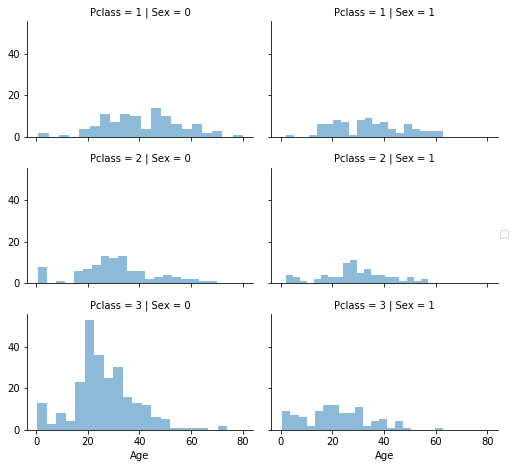

In [21]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()